In [35]:
import numpy as np 
import pandas as pd
#import calendar
import math

# plots
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [36]:
filenames = ['properties/properati-AR-2016-03-01-properties-sell-six_months.csv',
            'properties/properati-AR-2016-04-01-properties-sell.csv',
            'properties/properati-AR-2016-05-01-properties-sell.csv',
            'properties/properati-AR-2016-06-01-properties-sell.csv',
            'properties/properati-AR-2016-07-01-properties-sell.csv',
            'properties/properati-AR-2016-08-01-properties-sell.csv',
            'properties/properati-AR-2016-09-01-properties-sell.csv',
            'properties/properati-AR-2016-10-01-properties-sell.csv',
            'properties/properati-AR-2016-11-01-properties-sell.csv',
            'properties/properati-AR-2016-12-01-properties-sell.csv', 
            'properties/properati-AR-2017-01-01-properties-sell.csv',
            'properties/properati-AR-2017-02-01-properties-sell.csv',
            'properties/properati-AR-2017-08-01-properties-sell-six_months.csv']

dataframes = []
for filename in filenames:
    dataframes.append(pd.read_csv(filename))

# SAQUE ESTO PARA HACER LA REGRESION A PARTIR DEL 2DO SEMESTRE DEL 2016
#dataframes.append(pd.read_csv('properties/properati-AR-2015-07-01-properties-sell.csv', skiprows=[81550]))
#dataframes.append(pd.read_csv('properties/properati-AR-2015-08-01-properties-sell.csv', skiprows=[75032]))
#dataframes.append(pd.read_csv('properties/properati-AR-2015-09-01-properties-sell.csv', skiprows=[54374]))
#dataframes.append(pd.read_csv('properties/properati-AR-2015-12-01-properties-sell.csv', skiprows=[101832]))
#Uno los dataframe
data = pd.DataFrame()
for dataframe in dataframes:
    data = pd.concat([data, dataframe]).drop_duplicates().reset_index(drop=True)


In [37]:
data = data.loc[data.state_name.str.contains('Capital Federal|Buenos Aires.'),:]
data.info()
# 1.283.741 entries antes, ahora 204337, se redujeron 1/4 los datos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115928 entries, 9 to 296476
Data columns (total 27 columns):
id                            115928 non-null object
created_on                    115928 non-null object
operation                     115928 non-null object
property_type                 115928 non-null object
place_name                    115928 non-null object
place_with_parent_names       115928 non-null object
country_name                  115928 non-null object
state_name                    115928 non-null object
geonames_id                   110181 non-null float64
lat-lon                       98580 non-null object
lat                           98580 non-null float64
lon                           98580 non-null float64
price                         107445 non-null float64
currency                      105157 non-null object
price_aprox_local_currency    107445 non-null float64
price_aprox_usd               107445 non-null float64
surface_total_in_m2           84317 no

In [38]:
test = pd.read_csv('properties/properati_dataset_testing_noprice.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14166 entries, 0 to 14165
Data columns (total 17 columns):
id                         14166 non-null int64
created_on                 14166 non-null object
property_type              14166 non-null object
operation                  14166 non-null object
place_name                 14166 non-null object
place_with_parent_names    14166 non-null object
country_name               14166 non-null object
state_name                 14166 non-null object
lat-lon                    10487 non-null object
lat                        10487 non-null float64
lon                        10487 non-null float64
surface_total_in_m2        11853 non-null float64
surface_covered_in_m2      13005 non-null float64
floor                      1368 non-null float64
rooms                      7500 non-null float64
expenses                   2543 non-null object
description                14166 non-null object
dtypes: float64(6), int64(1), object(10)
memory usage: 1

In [39]:
test_visualiz = test.loc[:,['state_name', 'id']].groupby('state_name').agg(np.size)
test_visualiz.head(10)

,id
state_name,
Bs.As. G.B.A. Zona Norte,2
Bs.As. G.B.A. Zona Oeste,3101
Bs.As. G.B.A. Zona Sur,2215
Buenos Aires Interior,1
Capital Federal,8847


<br><B><FONT FACE="Arial" SIZE="5">Prediccion usando regresion lineal, en base a las propiedades: 'surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms'</FONT></B><br/>

In [40]:
data_float = data.loc[:, ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',\
                          'floor', 'rooms', 'lat', 'lon']].dropna(axis= 0, how='any')
#test_float = test.loc[:, ['surface_total_in_m2', 'surface_covered_in_m2']].dropna(axis= 0, how='any')

#filtro
data_float = \
data_float.loc[((data_float.surface_total_in_m2 >= 10.0) & (data_float.surface_total_in_m2 <= 1000.0)) & \
               ((data_float.surface_covered_in_m2 >= 15.0) & (data_float.surface_covered_in_m2 <= 800.0)) & \
               ((data_float.floor >= 1.0) & (data_float.floor <= 6.0)) & \
               ((data_float.rooms >= 1.0) & (data_float.rooms <= 12.0)), :]


#test_float = test_float.loc[(test_float.surface_total_in_m2 >= 42.0) & (test_float.surface_total_in_m2 <= 88.0), :]
#test_float = test_float.loc[(test_float.surface_covered_in_m2 >= 39.0) & (test_float.surface_covered_in_m2 <= 80.0), :]
#test_float = test_float.loc[(test_float.floor >= 1.0) & (test_float.floor <= 6.0), :]
#test_float = test_float.loc[(test_float.rooms >= 1.0) & (test_float.rooms <= 3.0), :]


data_float.describe()

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,floor,rooms,lat,lon
count,2.787000e+03,2787.000000,2787.000000,2787.000000,2787.000000,2787.000000,2787.000000
mean,1.506945e+05,74.889846,64.826695,2.807679,2.622533,-34.722510,-58.376817
std,1.144316e+05,51.740244,39.950145,1.700567,1.162791,0.613943,0.347678
min,0.000000e+00,12.000000,17.000000,1.000000,1.000000,-38.583214,-65.409012
25%,8.612500e+04,43.000000,39.000000,1.000000,2.000000,-34.615499,-58.457242
50%,1.250000e+05,62.000000,54.000000,2.000000,3.000000,-34.602113,-58.434093
75%,1.750000e+05,88.000000,79.000000,4.000000,3.000000,-34.586155,-58.403073
max,1.600000e+06,674.000000,494.000000,6.000000,8.000000,-24.783399,-56.677077


In [41]:
# actualmente trabajamos con 4602 entries
data_float.shape

(2787, 7)

In [42]:
# proceso de normalización de los datos. Por ahora no lo estamos usando, no nos mejoró nada
import pandas as pd
from sklearn import preprocessing

data_float_reduced = data_float.loc[:, ['surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms',\
                      'lat', 'lon']]
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data_float_reduced)
data_float_norm = pd.DataFrame(np_scaled)
data_float_norm.columns=['surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms',\
                      'lat', 'lon']
data_float_norm.describe()

,surface_total_in_m2,surface_covered_in_m2,floor,rooms,lat,lon
count,2787.000000,2787.000000,2787.000000,2787.000000,2787.000000,2787.000000
mean,0.095000,0.100266,0.361536,0.231790,0.279765,0.805342
std,0.078157,0.083753,0.340113,0.166113,0.044489,0.039817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.046828,0.046122,0.000000,0.142857,0.287519,0.796132
50%,0.075529,0.077568,0.200000,0.285714,0.288489,0.798783
75%,0.114804,0.129979,0.600000,0.285714,0.289646,0.802335
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
# para evitar la normalización meter esos hashtags acá
#data_float = data_float_norm
#data_float.describe()

In [44]:
#Creo X e Y
feature_cols = ['surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms']
X = data_float[feature_cols]
y = data_float.price_aprox_usd

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# Printeo los coeficientes
print (lm.intercept_)
print (lm.coef_)


9685.35861909
[ -119.46739943  2135.24303558  3319.91169888   844.23220747]


In [45]:
# Uno los coeficientes con su respectiva columna
zip(feature_cols, lm.coef_)

[('surface_total_in_m2', -119.46739942944926),
 ('surface_covered_in_m2', 2135.2430355816605),
 ('floor', 3319.9116988812148),
 ('rooms', 844.23220746570951)]

In [46]:
test.shape

(14166, 17)

In [47]:
test_float = test
test_float.fillna(0, inplace=True)
test_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14166 entries, 0 to 14165
Data columns (total 17 columns):
id                         14166 non-null int64
created_on                 14166 non-null object
property_type              14166 non-null object
operation                  14166 non-null object
place_name                 14166 non-null object
place_with_parent_names    14166 non-null object
country_name               14166 non-null object
state_name                 14166 non-null object
lat-lon                    14166 non-null object
lat                        14166 non-null float64
lon                        14166 non-null float64
surface_total_in_m2        14166 non-null float64
surface_covered_in_m2      14166 non-null float64
floor                      14166 non-null float64
rooms                      14166 non-null float64
expenses                   14166 non-null object
description                14166 non-null object
dtypes: float64(6), int64(1), object(10)
memory usage

In [48]:
test_float['price_aprox_usd_LR'] = lm.predict(test_float.loc[:, ['surface_total_in_m2', 'surface_covered_in_m2',\
                                'floor', 'rooms']])
test_float.head()
#PREGUNTAS
#HAY QUE FILTRAR EL .CSV QUE TENEMOS QUE PREDECIR? HAY DATOS TRUCHOS. ésta es una pregunta realmente importante
#USANDO REGRESION, HAGO LA PREDDCION DE LAS PROPIEDADES QUE SOLAMENTE TIENEN LAS 4 COLUMNAS CON DATOS POR LAS QUE HAGO
#LA PREDICCION?

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,description,price_aprox_usd_LR
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,-58.363464,0.0,0.0,0.0,0.0,0,Edificio BA Houses situado frente al Dique 3 d...,9685.358619
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0,El departamento cuenta con un living-comedor a...,9685.358619
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,-58.412880,53.0,48.0,0.0,0.0,1500,IMPECABLE TORRE COY III – DEPA...,105845.252157
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,0,0.000000,0.000000,39.0,39.0,0.0,0.0,0,AMBIENTE DIVISIBLE CON PISOS D...,88300.608429
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,0,0.000000,0.000000,51.0,51.0,0.0,0.0,0,LIVING COMEDOR CON PISOS DE PO...,112489.916063


<br><B><FONT FACE="Arial" SIZE="5">KNN - en base a las propiedades:'surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms'</FONT></B><br/>

In [49]:
#Un ejemplo de knn
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn.fit(X, y)

test_float['price_aprox_usd_KNN5'] = knn.predict(test_float.loc[:, ['surface_total_in_m2', \
                            'surface_covered_in_m2', 'floor', 'rooms']])
test_float.head()

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,description,price_aprox_usd_LR,price_aprox_usd_KNN5
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,-58.363464,0.0,0.0,0.0,0.0,0,Edificio BA Houses situado frente al Dique 3 d...,9685.358619,58960.000
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0,El departamento cuenta con un living-comedor a...,9685.358619,58960.000
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,-58.412880,53.0,48.0,0.0,0.0,1500,IMPECABLE TORRE COY III – DEPA...,105845.252157,116000.000
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,0,0.000000,0.000000,39.0,39.0,0.0,0.0,0,AMBIENTE DIVISIBLE CON PISOS D...,88300.608429,75900.000
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,0,0.000000,0.000000,51.0,51.0,0.0,0.0,0,LIVING COMEDOR CON PISOS DE PO...,112489.916063,85263.514


In [50]:
#Knn con cross-validation
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
neighbors = list(range(1,100))


# subsetting just the odd ones
#neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 25


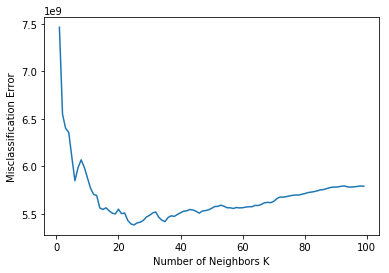

In [51]:
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [64]:
#Un ejemplo de knn
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=25, metric='euclidean')
knn.fit(X, y)

test_float['price_aprox_usd_KNN_25'] = knn.predict(test_float.loc[:, ['surface_total_in_m2', 'surface_covered_in_m2',\
                                        'floor', 'rooms']])
test_float.head()

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,...,surface_covered_in_m2,floor,rooms,expenses,description,price_aprox_usd_LR,price_aprox_usd_KNN5,price_aprox_usd_KNN_42,price_aprox_usd_KNN_42_lat_lon,price_aprox_usd_KNN_25
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,...,0.0,0.0,0.0,0,Edificio BA Houses situado frente al Dique 3 d...,9685.358619,58960.000,62475.674048,62475.674048,59760.0000
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,0,0.000000,...,0.0,0.0,0.0,0,El departamento cuenta con un living-comedor a...,9685.358619,58960.000,62475.674048,62444.721667,59760.0000
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,...,48.0,0.0,0.0,1500,IMPECABLE TORRE COY III – DEPA...,105845.252157,116000.000,105877.558810,105829.939762,114079.4376
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,0,0.000000,...,39.0,0.0,0.0,0,AMBIENTE DIVISIBLE CON PISOS D...,88300.608429,75900.000,84291.666667,73640.476190,78160.0000
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,0,0.000000,...,51.0,0.0,0.0,0,LIVING COMEDOR CON PISOS DE PO...,112489.916063,85263.514,94632.701190,94611.835476,83160.7428


In [65]:
test_float_reduced = test_float.loc[:,['id', 'price_aprox_usd_KNN_42']]
test_float_reduced.head(10)

,id,price_aprox_usd_KNN_42
0,3632,62475.674048
1,3633,62475.674048
2,2263404,105877.558810
3,2263405,84291.666667
4,2263406,94632.701190
5,2263407,84291.666667
6,2263408,84291.666667
7,2263409,84291.666667
8,2263410,130154.761905
9,2263411,104440.921905


In [66]:
test_float_reduced.columns=['id', 'price_usd']
test_float_reduced.head()

,id,price_usd
0,3632,62475.674048
1,3633,62475.674048
2,2263404,105877.558810
3,2263405,84291.666667
4,2263406,94632.701190


In [67]:
test_float_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14166 entries, 0 to 14165
Data columns (total 2 columns):
id           14166 non-null int64
price_usd    14166 non-null float64
dtypes: float64(1), int64(1)
memory usage: 221.4 KB


In [68]:
test_float_reduced.to_csv('Submitk25.csv', index=False)

<br><B><FONT FACE="Arial" SIZE="5">KNN2 - en base a las propiedades: 'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms', 'lat', 'lon'</FONT></B><br/>

In [57]:
#Knn con cross-validation

feature_cols2 = ['surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms', 'lat', 'lon']
X2 = data_float[feature_cols2]


from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
neighbors = list(range(1,200))


# subsetting just the odd ones
#neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores2 = []

# perform 10-fold cross validation
for k in neighbors:
    knn2 = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(knn2, X2, y, cv=10, scoring='neg_mean_squared_error')
    cv_scores2.append(scores.mean())


The optimal number of neighbors is 25


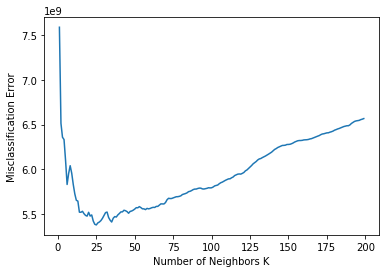

In [58]:

MSE2 = [1 - x for x in cv_scores2]

# determining best k
optimal_k2 = neighbors[MSE2.index(min(MSE2))]
print ("The optimal number of neighbors is %d" % optimal_k2)

# plot misclassification error vs k
plt.plot(neighbors, MSE2)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [69]:
#Un ejemplo de knn
from sklearn.neighbors import KNeighborsRegressor
knn2 = KNeighborsRegressor(n_neighbors=25, metric='euclidean')
knn2.fit(X2, y)

test_float['price_aprox_usd_KNN_25_lat_lon'] = knn2.predict(test_float.loc[:, ['surface_total_in_m2', \
                                'surface_covered_in_m2', 'floor', 'rooms', 'lat', 'lon']])
test_float.head()

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,...,floor,rooms,expenses,description,price_aprox_usd_LR,price_aprox_usd_KNN5,price_aprox_usd_KNN_42,price_aprox_usd_KNN_42_lat_lon,price_aprox_usd_KNN_25,price_aprox_usd_KNN_25_lat_lon
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,...,0.0,0.0,0,Edificio BA Houses situado frente al Dique 3 d...,9685.358619,58960.000,62475.674048,62475.674048,59760.0000,59760.0000
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,0,0.000000,...,0.0,0.0,0,El departamento cuenta con un living-comedor a...,9685.358619,58960.000,62475.674048,62444.721667,59760.0000,59760.0000
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,...,0.0,0.0,1500,IMPECABLE TORRE COY III – DEPA...,105845.252157,116000.000,105877.558810,105829.939762,114079.4376,114079.4376
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,0,0.000000,...,0.0,0.0,0,AMBIENTE DIVISIBLE CON PISOS D...,88300.608429,75900.000,84291.666667,73640.476190,78160.0000,63640.0000
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,0,0.000000,...,0.0,0.0,0,LIVING COMEDOR CON PISOS DE PO...,112489.916063,85263.514,94632.701190,94611.835476,83160.7428,85618.7432


In [70]:
test_float_reduced = test_float.loc[:,['id', 'price_aprox_usd_KNN_42_lat_lon']]
test_float_reduced.head(10)

,id,price_aprox_usd_KNN_42_lat_lon
0,3632,62475.674048
1,3633,62444.721667
2,2263404,105829.939762
3,2263405,73640.476190
4,2263406,94611.835476
5,2263407,73640.476190
6,2263408,73640.476190
7,2263409,73640.476190
8,2263410,130726.190476
9,2263411,102911.904762


In [71]:
test_float_reduced.columns=['id', 'price_usd']
test_float_reduced.head()

,id,price_usd
0,3632,62475.674048
1,3633,62444.721667
2,2263404,105829.939762
3,2263405,73640.476190
4,2263406,94611.835476


In [72]:
test_float_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14166 entries, 0 to 14165
Data columns (total 2 columns):
id           14166 non-null int64
price_usd    14166 non-null float64
dtypes: float64(1), int64(1)
memory usage: 221.4 KB


In [73]:
test_float_reduced.to_csv('SubmitK25latlon.csv', index=False)